# Understanding Descriptive Statistics

Import the necessary libraries here:

In [3]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [10]:
x = 10
def rolling_dice(x):
    roll = random.choices(range(1,7), k = x)
    return roll
rolling_dice(x)
RollDice = pd.DataFrame(rolling_dice(x), columns=["numbers"])
RollDice

,numbers
0,1
1,1
2,1
3,1
4,6
5,2
6,5
7,6
8,1
9,5


#### 2.- Plot the results sorted by value.

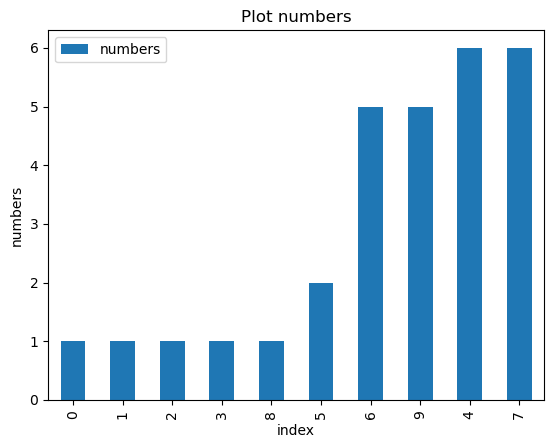

In [12]:
# your code here
RollDice.sort_values('numbers', inplace=True)

# plot the histogram
RollDice.plot(y = 'numbers', kind='bar', legend=False)

# add labels and title
plt.xlabel('index')
plt.ylabel('numbers')
plt.title('Plot numbers')
plt.legend()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [13]:
# Calculate frequency

frequency = RollDice["numbers"].value_counts()
freq_table = pd.DataFrame(frequency)
#freq_table.reset_index(inplace=True)
freq_table = freq_table.rename(columns = {'numbers':'freq'})
freq_table

,freq
1,5
5,2
6,2
2,1


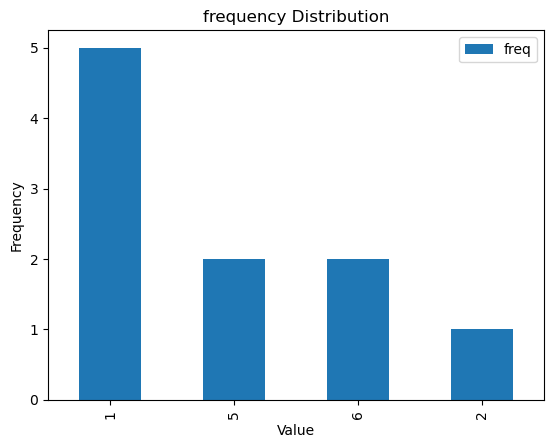

In [14]:
# your code here

# plot the histogram
freq_table.plot(y='freq', kind='bar', legend=False)

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('frequency Distribution')
plt.legend()

# display the plot
plt.show()

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [15]:
# your code here
numbers = RollDice["numbers"]
def mean_function(numbers):
    numbers = list(numbers)
    average = sum(numbers) / len(numbers)
    return average
mean_function(numbers)

2.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [16]:
# your code here
frequency = RollDice["numbers"].value_counts()
freq_table = pd.DataFrame(frequency)
freq_table = freq_table.rename(columns = {'numbers':'freq'})
freq_table
numbers = freq_table["freq"]
mean_function(numbers)

2.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [17]:
# your code here
numbers = RollDice["numbers"]
def median_function(numbers):
    numbers = list(numbers)
    n = len(numbers)
    s = sorted(numbers)
    median = (s[n//2-1]/2.0+s[n//2]/2.0, s[n//2])[n % 2]
    return median
median_function(numbers)

1.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [18]:
# your code here
def quartile(numbers):
    numbers = list(numbers)
    numbers.sort()               
    half_list = int(len(numbers)//2)
    upper_quartile = median_function(numbers[half_list:])
    lower_quartile = median_function(numbers[:half_list])
    quartile = upper_quartile-lower_quartile
    return quartile
quartile(numbers)

4

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [19]:
data = pd.read_csv("roll_the_dice_hundred.csv", sep =",")
data.head()

data.sort_values('value', inplace=True)
data

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


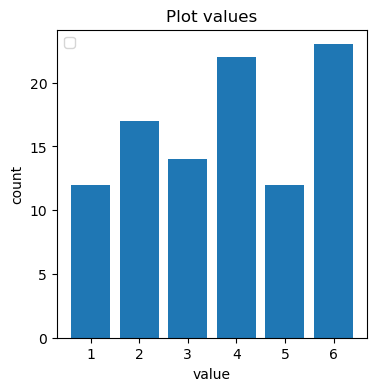

In [20]:
# Method 1 - matplotlib
data_value = data.value.value_counts()
plt.figure(figsize=(4,4))
plt.bar(data_value.index, data_value)
# add labels and title
plt.xlabel('value')
plt.ylabel('count')
plt.title('Plot values')
plt.legend()


In [21]:
"""
We can see that value 6 is the most frequent
"""

'\nWe can see that value 6 is the most frequent\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [22]:
# your code here
numbers = data["value"]
mean_function(numbers)

3.74

#### 3.- Now, calculate the frequency distribution.


In [23]:
# your code here
frequency = data["value"].value_counts()
freq_table = pd.DataFrame(frequency)
freq_table = freq_table.rename(columns = {'value':'freq'})
freq_table

,freq
6,23
4,22
2,17
3,14
1,12
5,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

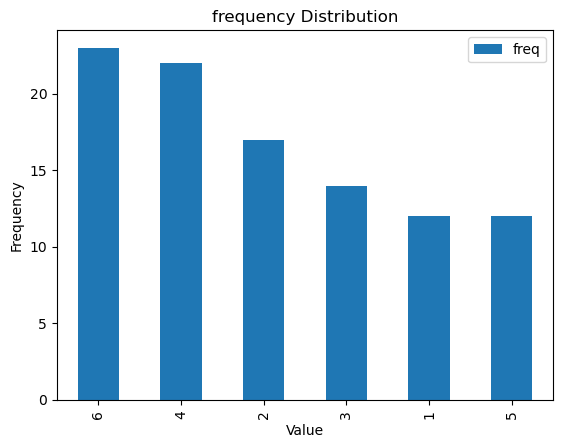

In [24]:
# your code here
# plot the histogram
freq_table.plot(y ='freq', kind='bar', legend=False)

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('frequency Distribution')
plt.legend()

# display the plot
plt.show()

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

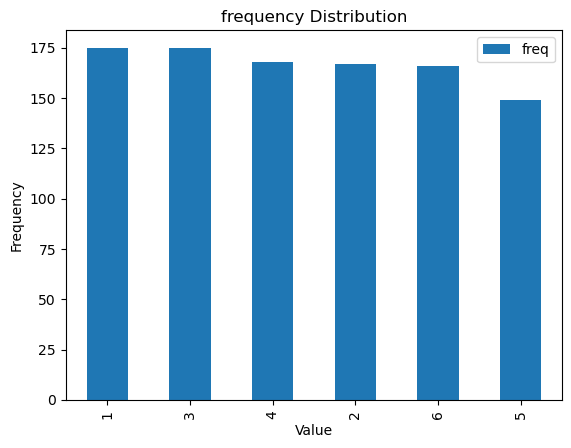

In [25]:
# your code here
data2 = pd.read_csv("roll_the_dice_thousand.csv")
frequency = data2["value"].value_counts()
freq_table = pd.DataFrame(frequency)
freq_table = freq_table.rename(columns = {'value':'freq'})
freq_table
# plot the histogram
freq_table.plot(y ='freq', kind='bar', legend=False)

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('frequency Distribution')
plt.legend()

# display the plot
plt.show()

In [ ]:
"""
We can notice that the bars are getting closer to each others regarding frequencies which is due the increase of number of trials
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [26]:
data.head()

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1


In [27]:
# your code here
data = pd.read_csv('ages_population.csv')

frequency = data["observation"].value_counts()
freq_table = pd.DataFrame(frequency)
freq_table = freq_table.rename(columns = {'observation':'freq'})
freq_table

,freq
39.0,45
41.0,36
30.0,34
35.0,33
43.0,32
...,...
73.0,1
82.0,1
70.0,1
71.0,1


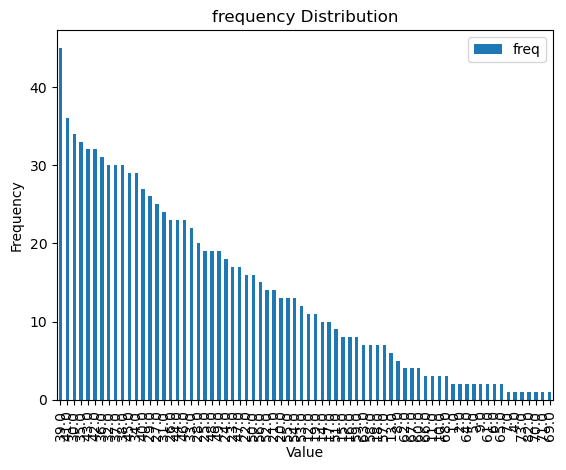

In [30]:
# plot the histogram
freq_table.plot(y ='freq', kind='bar', legend=False)

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('frequency Distribution')
plt.legend()

# display the plot
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [31]:
# your code here
print("the mean is: ", np.mean(data))
print('')
print("the std is: ", np.std(data))

the mean is:  observation    36.56
dtype: float64

the std is:  observation    12.81009
dtype: float64


C:\Users\Rachad\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [32]:
# your code here
data = pd.read_csv('ages_population2.csv')

frequency = data["observation"].value_counts()
freq_table = pd.DataFrame(frequency)
freq_table = freq_table.rename(columns = {'observation':'freq'})
freq_table

,freq
28.0,139
27.0,125
26.0,120
29.0,115
25.0,98
30.0,90
24.0,78
31.0,61
23.0,41
22.0,35


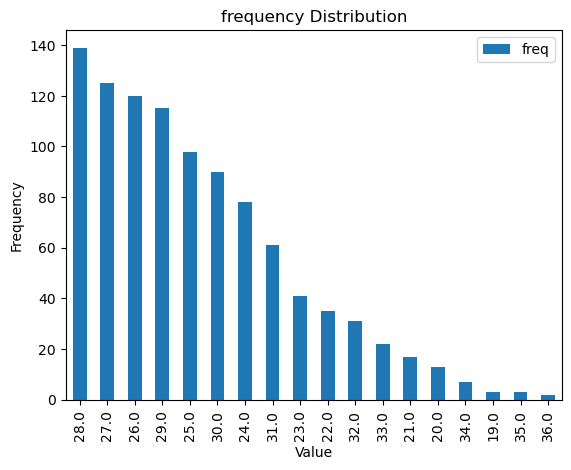

In [33]:
# plot the histogram
freq_table.plot(y ='freq', kind='bar', legend=False)

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('frequency Distribution')
plt.legend()

# display the plot
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [34]:
# your code here
print("the mean is: ", np.mean(data))
print('')
print("the std is: ", np.std(data))

the mean is:  observation    27.155
dtype: float64

the std is:  observation    2.968329
dtype: float64


C:\Users\Rachad\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [35]:
# your code here
data = pd.read_csv('ages_population3.csv')

frequency = data["observation"].value_counts()
freq_table = pd.DataFrame(frequency)
freq_table = freq_table.rename(columns = {'observation':'freq'})
freq_table

,freq
32.0,37
35.0,31
37.0,31
39.0,29
36.0,26
...,...
76.0,1
8.0,1
9.0,1
1.0,1


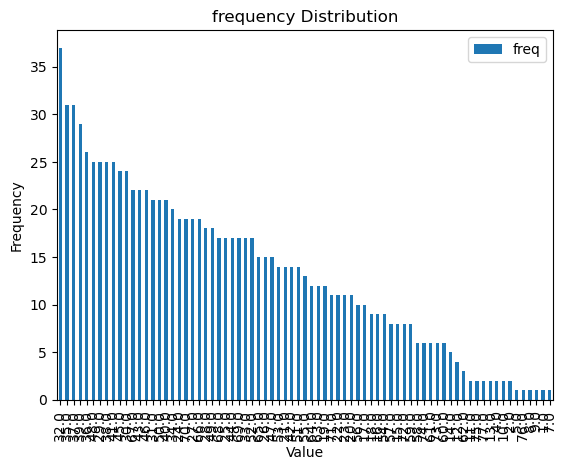

In [36]:
# plot the histogram
freq_table.plot(y ='freq', kind='bar', legend=False)

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('frequency Distribution')
plt.legend()

# display the plot
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [37]:
# your code here
print("the mean is: ", np.mean(data))
print('')
print("the std is: ", np.std(data))

the mean is:  observation    41.989
dtype: float64

the std is:  observation    16.136632
dtype: float64


C:\Users\Rachad\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [38]:
# your code here
np.percentile(data, [25, 50, 75])

array([30., 40., 53.])

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [39]:
# your code here
np.percentile(data, [5, 95])

array([17., 70.])

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""